# Machine Learning: No deep Learning

## 1. Binary Logistic Regression

In this section, let $\mathcal{D} = \{(\mathbf{x}_i \in \mathbb{R}^d, y_i \in \{0, 1\})\}_{i=1}^n$ be our training dataset. The samples are **i.i.d**.

### 1.1 Formulation

**Logistic Regression is a classification model where the prediction function is a sigmoid function.**
> The prediction function is defined as: $$ \mathbf{x} \mapsto f(\mathbf{x}; \theta=\{\mathbf{w}, b\}) = \frac{1}{1 + exp( -( \mathbf{x}^T\mathbf{w} + b))}.$$

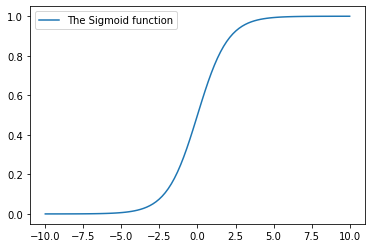

In [114]:
# Plotting a sigmoid function
import numpy as np
import pylab as plt

sigmoid = lambda t : 1./(1. + np.exp(-t))

x_coords = np.linspace(-10, 10, 100) 
plt.plot(x_coords, sigmoid(x_coords))
plt.legend(["The Sigmoid function"])

### 1.2 The Log-Likelihood as loss function

We will use a probabilistic interpretation of the sigmoid prediction function (as a **Bernouilli distribution**). Let $$\begin{align} p(y=1 | \mathbf{x}; \theta) &= f(\mathbf{x}; \theta), \\ p(y=0 | \mathbf{x}; \theta) &= 1 - f(\mathbf{x}; \theta). \end{align}$$

Therefore, the **likelihood**, $L(\theta)$, is defined as 
$$
\begin{align} 
    L(\theta) = p(y | \mathbf{x}; \theta) &= f(\mathbf{x}; \theta)^y (1 - f(\mathbf{x}; \theta))^{(1-y)}, \\
    &= \Pi_{i=1}^n f(\mathbf{x}_i; \theta)^{y_i} (1 - f(\mathbf{x}_i; \theta))^{(1-y_i)}. \\
\end{align}
$$


The **Log-likelihood** is 
$$ 
\begin{align} 
    \log L(\theta) &=  \frac{1}{n}\sum_{i=1}^n y_i \log f(\mathbf{x}_i; \theta) + (1-y_i) \log (1 - f(\mathbf{x}_i; \theta)), \\
    %&= \sum_{i=1}^n y_i \log(\exp(- (\mathbf{x}_i^T \mathbf{w} + b )) + 1) + (1 - y_i) \log(\exp(\mathbf{x}_i^T \mathbf{w} + b) + 1)\\
\end{align} 
$$

The standard logistic regression loss function is therefore given by the **negative log-likelihood**
$$\mathcal{L}(\theta) = - \log L(\theta).$$

We now, need to compute the gradient of the loss w.r.t the parameters $(\mathbf{w}, b)$.

$$
\begin{align}
\nabla_{\mathbf{w}} \mathcal{L}(\theta) &= - \sum_{i=1}^n y_i \nabla_{\mathbf{w}}  \log f(\mathbf{x}_i; \theta) + (1-y_i) \nabla_{\mathbf{w}}  \log (1 - f(\mathbf{x}_i; \theta)), \\
&=  - \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big)\nabla_{\mathbf{w}} f(\mathbf{x}_i; \theta), \\
&= -  \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big) f(\mathbf{x}_i; \theta) (1 - f(\mathbf{x}_i; \theta) ) \nabla_{\mathbf{w}} (\mathbf{x}_i^T\mathbf{w} + b), \\
&= -  \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big) f(\mathbf{x}_i; \theta) (1 - f(\mathbf{x}_i; \theta) ) \ \mathbf{x}_i , \\
&= -  \sum_{i=1}^n \big( y_i   -   f(\mathbf{x}_i; \theta)  \big)  \mathbf{x}_i
\end{align}
$$

$$
\begin{align}
\nabla_{b} \mathcal{L}(\theta) &=  - \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big) f(\mathbf{x}_i; \theta) (1 - f(\mathbf{x}_i; \theta) ) \nabla_{b} (\mathbf{x}_i^T\mathbf{w} + b), \\
&= -  \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big) f(\mathbf{x}_i; \theta) (1 - f(\mathbf{x}_i; \theta) ) , \\
&= -  \sum_{i=1}^n \big( y_i   -   f(\mathbf{x}_i; \theta)  \big)
\end{align}
$$

#### Toy example of a Logistic Regressor

1. **Generate a random binary dataset**

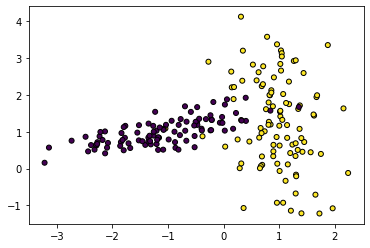

In [115]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification

# we create 50 separable points
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', s=25) 

2. **Designing the Logistic Model**

In [120]:
class MyLogisticRegression:
    def __init__(self, n_feats, n_iter, lr):
        """
        n_feats: (integer) 
            Dimension of the input data
        n_iter: (integer)
            Number of training iteration
        lr: (float)
            learning rate
        """
        self.w = np.zeros((1, n_feats))
        self.b = 0

        self.n_feats = n_feats
        self.n_iter = n_iter
        self.lr = lr

        self.losses = []
        self.grads = []

    def _optimize(self, X, y):
        m = X.shape[0]

        # cost function
        probs = self.activation(X) 
        cost = (-1/m)*(np.sum((y*np.log(probs)) + ((1-y)*(np.log(1-probs)))))

        # computing the gradient 
        dw = (1/m)*(np.dot((probs - y), X))
        db = (1/m)*(np.sum(probs - y))

        grads = {"dLdw": dw, "dLdb": db}

        return grads, cost

    def activation(self, X):            
        return 1./(1. + np.exp(-np.dot(self.w, X.T) - self.b))
    
    def fit(self, X, y):
        """
            Training the model
            
            X: (array, n_samples x n_feats)
                data matrix
            y: (array, n_samples)
                targets 
        """
        for i in range(self.n_iter):
            grads, cost = self._optimize(X, y)
            #
            dLdw = grads['dLdw']
            dLdb = grads['dLdb']
            
            # gradient descent
            self.w = self.w - self.lr * dLdw
            self.b = self.b - self.lr * dLdb
            
            self.losses.append(cost)
            self.grads.append(grads)
            if (i % 10 == 0):
                print("Standard Logistic Regression: Iter {}, Cost {}".format(i, cost))
            
        print("Standard Logistic Regression: Iter {}, Cost {}".format(i, cost))
    
    def predict(self, X):
        """
            Predicting the discrete labels
            
            X: (array, n_samples x n_feats)
                data matrix 
        """
        activ = self.activation(X)
        return np.argmax(activ, 1)
    
    def predict_proba(self, X):
        
        """
            Predicting the probabilities

            X: (array, n_samples x n_feats)
                data matrix 
        """
        return self.activation(X) 
    
    def score(self, X, y): 
        """
            computing the accuracy of the model
            
            X: (array, n_samples x n_feats)
                data matrix
            y: (array, n_sample)
                targets 
        """
        pred = self.predict(X)
        return (pred == y).mean()
    

3. **Instanciating the model and training**

In [127]:
clf = MyLogisticRegression(n_feats=2, n_iter=1000, lr=0.2)
clf.fit(X, y)

Standard Logistic Regression: Iter 0, Cost 0.6931471805599452
Standard Logistic Regression: Iter 10, Cost 0.4174960137797045
Standard Logistic Regression: Iter 20, Cost 0.3344481243516086
Standard Logistic Regression: Iter 30, Cost 0.29578922925484175
Standard Logistic Regression: Iter 40, Cost 0.2735141645769967
Standard Logistic Regression: Iter 50, Cost 0.2590734584649922
Standard Logistic Regression: Iter 60, Cost 0.24899209814552364
Standard Logistic Regression: Iter 70, Cost 0.2415878042577485
Standard Logistic Regression: Iter 80, Cost 0.2359451627958949
Standard Logistic Regression: Iter 90, Cost 0.23152260104428027
Standard Logistic Regression: Iter 100, Cost 0.22797894838341667
Standard Logistic Regression: Iter 110, Cost 0.22508850583949655
Standard Logistic Regression: Iter 120, Cost 0.22269599765832904
Standard Logistic Regression: Iter 130, Cost 0.22069111377509865
Standard Logistic Regression: Iter 140, Cost 0.21899336248468046
Standard Logistic Regression: Iter 150, Cos

4. **Plotting the decision boundary of the model**

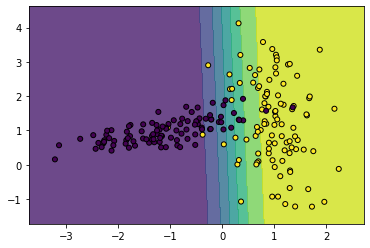

In [128]:
def print_decision(X, clf):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = plt.subplot(111)
    ax.contourf(xx, yy, Z, alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', s=25) 

print_decision(X, clf)

### 1.3 The regularized Log-Likelihood as loss function

The **regularized** logistic regression loss function consists in assuming that the parameters follow a certain *a priori* distribution. We then used the **maximum a posteriori (MAP)** estimatimation to derive the final loss function.

Let $p(\theta)$ be the *a priori*.

The goal is to minimize
$$
\begin{align}
\mathcal{L}(\theta) &= - \log L(\theta)p(\theta), \\
&= - \log L(\theta) - \log p(\theta).
\end{align}$$

#### The $\ell_2$ regularization

The *a priori* is given by:
$$p(\theta = \{\mathbf{w}\}) = exp( - \lambda \|w\|_2^2)$$

#### Example using the scikit-learn model

In [107]:
from sklearn.linear_model import LogisticRegression

In [113]:
clf = LogisticRegression(C=50. / 100 , penalty='l2', solver='saga', tol=0.1)
clf.fit(X, y)
print("score: {}, sparsity: {} ".format(clf.score(X, y), np.mean(clf.coef_ == 0) * 100))

score: 0.935, sparsity: 0.0 


## 2. Multi-class classification

In this section, let $\mathcal{D} = \{(\mathbf{x}_i \in \mathbb{R}^d, \mathbf{y_i} \in \{0, 1\}^{C})\}_{i=1}^n$ be our training dataset. The samples are **i.i.d**.

### 2.1 Formulation

In the case of multi-class tasks, the multinomial logistic regression can be used (*a.k.a.* **softmax regression**). The probability to obtain the class $c$ given an input $\mathbf{x}$ is given by
$$p(y = c | \mathbf{x}; \theta) = \frac{exp( ( \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)})}{\sum_{k=1}^C exp( ( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)})}, $$
where $(\mathbf{w}^{(k)}, b^{(k)})$ are the parameter set dedicated to the $k$-th class.

Notice that we can retrieve the binary formulation from the multinomial definition. Say we have two class 0 and 1, then 
$p(y = 1 | \mathbf{x}; \theta) = \frac{exp( \mathbf{x}^T\mathbf{w}^{(1)} + b^{(1)})}{ exp( \mathbf{x}^T\mathbf{w}^{(1)} + b^{(1)}) + exp( \mathbf{x}^T\mathbf{w}^{(0)} + b^{(0)})} = \frac{1 }{1 + exp\Big( \big( \mathbf{x}^T\mathbf{w}^{(0)} + b^{(0)} \big) - \big(\mathbf{x}^T\mathbf{w}^{(1)} + b^{(1)}\big) \Big)} = \frac{1 }{1 + exp \Big(  \mathbf{x}^T \big(\mathbf{w}^{(0)} - \mathbf{w}^{(1)} \big) +  \big(b^{(0)} -  b^{(1)}\big) \Big)}.$

> **N.B.**: The sofmax function is defined as 
$ \mathbf{t} \in \mathbf{R}^C \mapsto \text{softmax} (\mathbf{t}) = \frac{1 }{\sum_{k=1}^C e^{\mathbf{t}[k]}}\Big[e^{ \mathbf{t}[1]}, e^{ \mathbf{t}[2]}, \cdots, e^{ \mathbf{t}[C] }\Big] $

#### 2.1.2 The Loss function

Given a data point $\mathbf{x}$, the likelihood is given by
$$
 L(\theta) = p(y|\mathbf{x}; \theta) = \Pi_{k=1}^C p(y = k|\mathbf{x}; \theta)^{\mathbb{1}\{y=k\}},
$$

where $\mathbb{1}\{\cdot\}$ is the indicator function.

And the negative log-likelihood, our multi-class loss function, is
$$
\begin{align}
 \mathcal{L}(\theta) = -\log L(\theta) &= p(y|\mathbf{x}; \theta) = - \sum_{k=1}^C {\mathbb{1}\{y=k\}} \log p(y = k|\mathbf{x}; \theta),
\end{align}
$$

The gradient w.r.t. to the $k$-th parameter $\mathbf{w}^{(k)}$ is
$$
 \nabla_{\mathbf{w}^{(k)}} \mathcal{L}(\theta) = -\big({\mathbb{1}\{y=k\}} +  p(y = k|\mathbf{x}; \theta) \big) \mathbf{x}.
$$

### 2.2 Example  (MNIST: handwritten digits classification)

The main objective is to predict the digit inside an input image.
<img src="images/mnist_goal.png" width="40%">

The practical workflow is depicted below. 

1. Flattening the image to obtain a vector (*a.k.a* the **the feature vector**)
2. Applying the model
3. Using the argmax to retrieve the final output

<img src="images/mnist_practical.png" width="40%">

#### Import the important libraries
- **fetch_openml** will be used to retrieve the dataset
- **LogisticRegression** is the scikit-learn class for this type of model
- **train_test_split** is used to split dataset into 2 folds (train and test) eventually 3 with additional validation set
- **StandardScaler** is used to normalize the data by substracting the mean and dividing by the variance
- **check_random_state** is used to randomly permutate the data

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state


#### We fix the number of training sample 

In [3]:
train_samples = 5000

#### Data acquisition and preprocesing
1. Load the MNIST data from https://www.openml.org/d/554
2. Shuffling the data randomly
3. Splitting the data into **Train** and **Test** sets
4. Normalizing the data

In [4]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Initializing the classifier

In [5]:
# Turn up tolerance for faster convergence
clf = LogisticRegression(
    C=50. / train_samples, penalty='l1', solver='saga', tol=0.1
)

#### Training the classifier

In [6]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.1, verbose=0,
                   warm_start=False)

#### Printing some metrics:
- The sparsity level
- The Test score

In [ ]:
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

In [ ]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')
plt.show()

#### Plotting the learned parameters

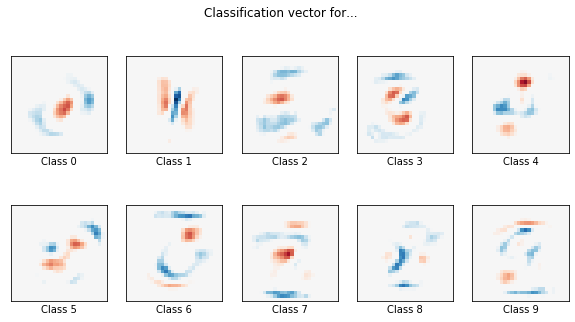

In [8]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')
plt.show()

## 2. Support Vector Machine (SVM)
## 3. Decision Trees and Random Forests
## 4. Clustering (K-Means)